# House Prices Machine Learning

1. Setting up
2. Data Exploration & Outlier Detection & Fix
3. Feature Engineering
4. Model building & Hyperparameter Tuning
5. Model Evaluation & Prediction

## 1. Setting up

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [281]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [411]:
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


In [282]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [283]:
test_id = test.Id
test.drop('Id', axis=1, inplace=True)
train.drop('Id', axis=1, inplace=True)

## 2. Data Exploration & Outlier Detection & Fix 

In [284]:
def show_missing_values(df):
    df_nan = df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)
    df_nan_percent = np.round(df_nan*100/df.shape[0],2)
    print(pd.concat([df_nan, df_nan_percent], axis = 1, keys = ['#Nan', '%Nan']))

In [285]:
train_tmp = train.drop('SalePrice',axis=1)
total = pd.concat([train_tmp, test], axis=0).reset_index(drop=True)

In [286]:
total.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

In [287]:
total.shape

(2919, 79)

In [288]:
show_missing_values(total)

              #Nan   %Nan
PoolQC        2909  99.66
MiscFeature   2814  96.40
Alley         2721  93.22
Fence         2348  80.44
FireplaceQu   1420  48.65
LotFrontage    486  16.65
GarageFinish   159   5.45
GarageYrBlt    159   5.45
GarageQual     159   5.45
GarageCond     159   5.45
GarageType     157   5.38
BsmtExposure    82   2.81
BsmtCond        82   2.81
BsmtQual        81   2.77
BsmtFinType2    80   2.74
BsmtFinType1    79   2.71
MasVnrType      24   0.82
MasVnrArea      23   0.79
MSZoning         4   0.14
BsmtFullBath     2   0.07
BsmtHalfBath     2   0.07
Utilities        2   0.07
Functional       2   0.07
Exterior2nd      1   0.03
Exterior1st      1   0.03
SaleType         1   0.03
BsmtFinSF1       1   0.03
BsmtFinSF2       1   0.03
BsmtUnfSF        1   0.03
Electrical       1   0.03
KitchenQual      1   0.03
GarageCars       1   0.03
GarageArea       1   0.03
TotalBsmtSF      1   0.03


Let's explore PoolQC

In [289]:
total.PoolArea.value_counts()

0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

In [290]:
total.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

Looking at PoolArea of zero it shows that the missing values of Pool Quality are actually cases where the house doesn't have a pool

In [291]:
total.PoolQC.fillna('Na', inplace=True)

In [292]:
show_missing_values(total)

              #Nan   %Nan
MiscFeature   2814  96.40
Alley         2721  93.22
Fence         2348  80.44
FireplaceQu   1420  48.65
LotFrontage    486  16.65
GarageFinish   159   5.45
GarageYrBlt    159   5.45
GarageQual     159   5.45
GarageCond     159   5.45
GarageType     157   5.38
BsmtExposure    82   2.81
BsmtCond        82   2.81
BsmtQual        81   2.77
BsmtFinType2    80   2.74
BsmtFinType1    79   2.71
MasVnrType      24   0.82
MasVnrArea      23   0.79
MSZoning         4   0.14
BsmtFullBath     2   0.07
BsmtHalfBath     2   0.07
Functional       2   0.07
Utilities        2   0.07
Exterior2nd      1   0.03
Exterior1st      1   0.03
SaleType         1   0.03
BsmtFinSF1       1   0.03
BsmtFinSF2       1   0.03
BsmtUnfSF        1   0.03
Electrical       1   0.03
KitchenQual      1   0.03
GarageCars       1   0.03
GarageArea       1   0.03
TotalBsmtSF      1   0.03


Let's check for the other missing values

In [293]:
total.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [294]:
total.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [295]:
total_missing = total.isnull().sum()[total.isnull().sum()>0].sort_values(ascending=False)
for features in total:
    if total[features].isnull().sum()>0 and total[features].dtypes == 'object':
        print(total[features].value_counts())
        features_for_NA.append(features)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Grvl    120
Pave     78
Name: Alley, dtype: int64
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64
None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
TA    2606
Gd     122
Fa     104
Po       5
Name: Bsm

It can be seen that all these are cases of not applicable (NA). Let's fill the Nan's with NA then.

In [296]:
print(features_for_NA)

['MiscFeature', 'Fence', 'Alley', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'SaleType', 'MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature', 'SaleType']


Exclude some features that have to be handled by imputing with mode

In [297]:
features_to_exclude = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd',
                       'Electrical', 'KitchenQual', 'Functional', 'SaleType']

In [298]:
for ftr in features_for_NA:
    if ftr not in features_to_exclude:
        total[ftr].fillna('NA', inplace=True)

In [299]:
show_missing_values(total)

              #Nan   %Nan
LotFrontage    486  16.65
GarageYrBlt    159   5.45
MasVnrArea      23   0.79
MSZoning         4   0.14
Functional       2   0.07
Utilities        2   0.07
BsmtHalfBath     2   0.07
BsmtFullBath     2   0.07
BsmtFinSF1       1   0.03
Exterior1st      1   0.03
Exterior2nd      1   0.03
SaleType         1   0.03
BsmtFinSF2       1   0.03
BsmtUnfSF        1   0.03
GarageArea       1   0.03
Electrical       1   0.03
KitchenQual      1   0.03
GarageCars       1   0.03
TotalBsmtSF      1   0.03


Of these, the object missing values are to be filled using their mode

In [300]:
total_missing = total.isnull().sum()[total.isnull().sum()>0].sort_values(ascending=False)
for features in total:
    if total[features].isnull().sum()>0 and total[features].dtypes == 'object':
        total[features].fillna(total[features].mode()[0], inplace=True)

In [301]:
show_missing_values(total)

              #Nan   %Nan
LotFrontage    486  16.65
GarageYrBlt    159   5.45
MasVnrArea      23   0.79
BsmtHalfBath     2   0.07
BsmtFullBath     2   0.07
GarageArea       1   0.03
GarageCars       1   0.03
TotalBsmtSF      1   0.03
BsmtUnfSF        1   0.03
BsmtFinSF2       1   0.03
BsmtFinSF1       1   0.03


Apart from LotFrontage, GarageYrBlt and MasVnrArea, the other nan's can safely be filled with 0

In [302]:
features_to_exclude = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
for features in total:
    if (total[features].isnull().sum()>0) and (features not in features_to_exclude):
        total[features].fillna(0, inplace=True)

In [303]:
show_missing_values(total)

             #Nan   %Nan
LotFrontage   486  16.65
GarageYrBlt   159   5.45
MasVnrArea     23   0.79


### Lot Frontage

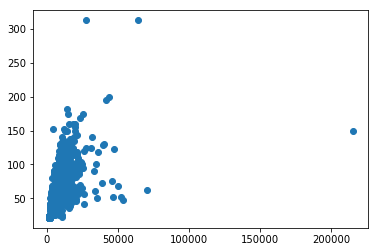

In [304]:
total_lot =  (total[(pd.notnull(total.LotFrontage))][['LotFrontage','LotArea']])
plt.scatter(x = total_lot.LotArea, y = total_lot.LotFrontage)
plt.show()

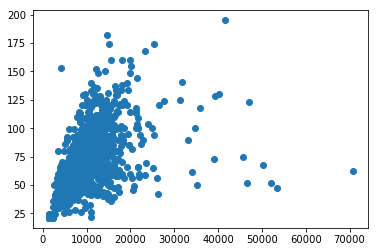

In [305]:
total_lot =  (total[(pd.notnull(total.LotFrontage)) & (total.LotFrontage < 200) & (total.LotArea < 100000)][['LotFrontage','LotArea']])
plt.scatter(x = total_lot.LotArea, y = total_lot.LotFrontage)
plt.show()

In [306]:
total.LotConfig.value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [307]:
total.groupby(['LotConfig','LotShape']).count()['LotFrontage']

LotConfig  LotShape
Corner     IR1          124
           IR2            2
           IR3            4
           Reg          277
CulDSac    IR1           67
           IR2           18
           IR3            2
           Reg            2
FR2        IR1           13
           IR2            6
           Reg           46
FR3        IR1            4
           Reg            6
Inside     IR1          439
           IR2           22
           IR3            5
           Reg         1396
Name: LotFrontage, dtype: int64

In [308]:
import seaborn as sns

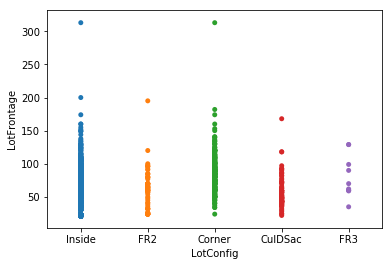

In [309]:
sns.stripplot(x = total.LotConfig, y = total.LotFrontage)
plt.show()

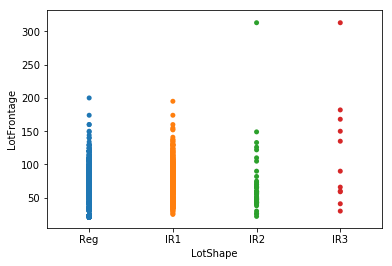

In [310]:
sns.stripplot(x = total.LotShape, y = total.LotFrontage)
plt.show()

In [311]:
total_lots = total[['LotFrontage','LotArea','LotShape','LotConfig']]
total_lots.head()

,LotFrontage,LotArea,LotShape,LotConfig
0,65.0,8450,Reg,Inside
1,80.0,9600,Reg,FR2
2,68.0,11250,IR1,Inside
3,60.0,9550,IR1,Corner
4,84.0,14260,IR1,FR2


In [312]:
Shape_vals = total_lots.LotShape.unique()
shape_dict = dict()
val = 0
for shape in Shape_vals:
    shape_dict[shape] = val
    val += 1
print(shape_dict)

{'IR1': 1, 'IR2': 2, 'IR3': 3, 'Reg': 0}


In [313]:
total_lots['LotShape_dummy']=total_lots.LotShape.map(shape_dict)
total_lots[['LotShape','LotShape_dummy']].head()

C:\Users\Elijah Toppo\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,LotShape,LotShape_dummy
0,Reg,0
1,Reg,0
2,IR1,1
3,IR1,1
4,IR1,1


In [314]:
Config_vals = total_lots.LotConfig.unique()
config_dict = dict()
val = 0
for config in Config_vals:
    config_dict[config] = val
    val += 1
print(config_dict)
total_lots['LotConfig_dummy']=total_lots.LotConfig.map(config_dict)
total_lots[['LotConfig','LotConfig_dummy']].head()

{'CulDSac': 3, 'FR2': 1, 'Inside': 0, 'FR3': 4, 'Corner': 2}


C:\Users\Elijah Toppo\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,LotConfig,LotConfig_dummy
0,Inside,0
1,FR2,1
2,Inside,0
3,Corner,2
4,FR2,1


In [315]:
total_lots.corr()

,LotFrontage,LotArea,LotShape_dummy,LotConfig_dummy
LotFrontage,1.000000,0.489896,0.172441,0.141599
LotArea,0.489896,1.000000,0.288566,0.156811
LotShape_dummy,0.172441,0.288566,1.000000,0.295152
LotConfig_dummy,0.141599,0.156811,0.295152,1.000000


Let's fill the null values of LotFrontage using a linear regression model with LotArea, LotShape and LotConfig as features

In [318]:
total_lots.drop(['LotShape', 'LotConfig'], inplace = True, axis=1)
total_lots.head()

C:\Users\Elijah Toppo\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,LotFrontage,LotArea,LotShape_dummy,LotConfig_dummy
0,65.0,8450,0,0
1,80.0,9600,0,1
2,68.0,11250,1,0
3,60.0,9550,1,2
4,84.0,14260,1,1


In [319]:
total_lots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 4 columns):
LotFrontage        2433 non-null float64
LotArea            2919 non-null int64
LotShape_dummy     2919 non-null int64
LotConfig_dummy    2919 non-null int64
dtypes: float64(1), int64(3)
memory usage: 91.3 KB


In [333]:
train_lots = total_lots[total_lots.LotFrontage.isnull()==0]
test_lots = total_lots[total_lots.LotFrontage.isnull()>0]
test_lots_x = test_lots.drop('LotFrontage',axis = 1)
train_lots_x = train_lots.drop('LotFrontage', axis = 1)
train_lots_y = train_lots.LotFrontage
train_lots.info()
test_lots_x.info()
train_lots_x.head()
train_lots_y.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2433 entries, 0 to 2918
Data columns (total 4 columns):
LotFrontage        2433 non-null float64
LotArea            2433 non-null int64
LotShape_dummy     2433 non-null int64
LotConfig_dummy    2433 non-null int64
dtypes: float64(1), int64(3)
memory usage: 95.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 7 to 2908
Data columns (total 3 columns):
LotArea            486 non-null int64
LotShape_dummy     486 non-null int64
LotConfig_dummy    486 non-null int64
dtypes: int64(3)
memory usage: 15.2 KB


0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [316]:
from sklearn.linear_model import LinearRegressionarRegression

In [336]:
regressor = LinearRegression()
regressor.fit(train_lots_x, train_lots_y)

test_lots_y = regressor.predict(test_lots_x)
print(test_lots_y)
test_lots_y.shape

[  73.88883692   74.84698659   74.81982393   77.40804233   66.12709419
   72.74099406   73.84156607   73.87617525   80.4716123    67.53211815
   85.74520049   66.52336933   66.61854458   73.36980803   70.20578635
   68.79944778   65.26878646   91.71418757   71.41007706   95.07949096
   60.3854308    77.07634264   63.71656462   73.84211452   74.40396528
   62.10712878   83.57193775   74.67026206   77.19865678   70.38748456
   84.76823347   73.24274213   74.92983093   54.97244579   75.16882822
   70.88594187   58.98884143   73.47635411   76.71404314   72.75247373
   83.02220021   65.81907246   64.89489844   74.31398141   67.22420527
  333.64761721   69.62325517   69.98319067   68.8491064    84.75092888
   65.56296451   73.21505478   65.15630662   75.73449443   72.42942634
   70.242126    340.86061048   66.09410662   80.05737526   82.31380888
   60.97897828   67.86101423   71.00361309   67.1323821    86.42310085
   68.29708993   72.93362348   65.9107868    69.19692868  148.37136761
   66.

(486L,)

In [337]:
total.loc[total.LotFrontage.isnull(), 'LotFrontage'] = test_lots_y

In [338]:
show_missing_values(total)

             #Nan  %Nan
GarageYrBlt   159  5.45
MasVnrArea     23  0.79


### Garage Year Built

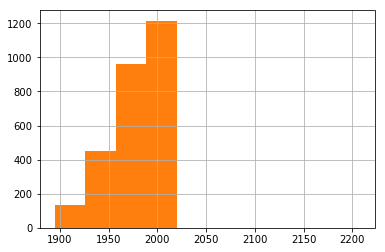

In [347]:
total.GarageYrBlt.hist()
plt.show()

In [355]:
total.GarageYrBlt.corr(total.YearBuilt)

0.83481237316310131

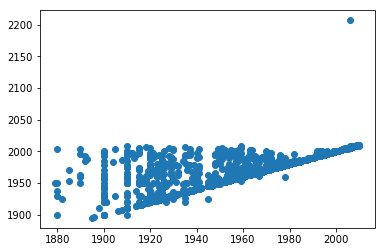

In [357]:
plt.scatter(x = total.YearBuilt, y = total.GarageYrBlt)
plt.show()

There seems to be a good correlation between YearBuilt and GarageYearBuilt. 
It also makes sense that the garage is mostly built either the same year or a few years after the house is built.
There seems to be an outlier with GarageYearBuilt as 2207. Seems to be a typo and needs to be set to the year the house was built i.e. 2006.

In [367]:
total.loc[total.GarageYrBlt == 2207]['GarageYrBlt'] = 2006

C:\Users\Elijah Toppo\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [370]:
total.loc[total.GarageYrBlt == 2207, 'GarageYrBlt'] = 2006

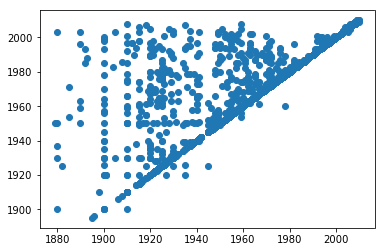

In [371]:
plt.scatter(x = total.YearBuilt, y = total.GarageYrBlt)
plt.show()

We will fill the missing GarageYrBlt with the YearBuilt values

In [374]:
total.loc[total.GarageYrBlt.isnull(), 'GarageYrBlt'] = total.YearBuilt

In [375]:
show_missing_values(total)

            #Nan  %Nan
MasVnrArea    23  0.79


### Masonry Veneer Area

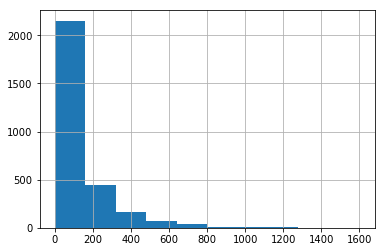

In [377]:
total.MasVnrArea.hist()
plt.show()

In [378]:
total.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
NA           24
Name: MasVnrType, dtype: int64

In [382]:
total.loc[total.MasVnrType == 'NA', 'MasVnrType'] = 'None'
total.MasVnrType.value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

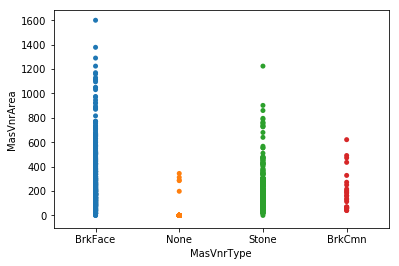

In [385]:
sns.stripplot(x = total.MasVnrType, y = total.MasVnrArea)
plt.show()

In [389]:
total.loc[total.MasVnrArea.isnull(),'MasVnrArea'] = 0

In [390]:
show_missing_values(total)

Empty DataFrame
Columns: [#Nan, %Nan]
Index: []


## 3. Feature Engineering

In [395]:
total_temp = total
total_temp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,Na,NA,NA,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,Na,NA,NA,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,Na,NA,NA,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,Na,NA,NA,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,0,Na,NA,NA,0,12,2008,WD,Normal


In [398]:
total_temp = pd.get_dummies(total_temp)

In [410]:
train_Y = train.SalePrice
print(train_Y.shape)
train_x = total_temp.iloc[:len(train_Y),:]
print(train_x.shape)
test_x = total_temp.iloc[len(train_Y):,:]
print(test_x.shape)

(1460L,)
(1460, 302)
(1459, 302)


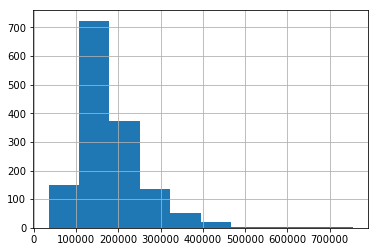

In [414]:
train_Y.hist()
plt.show()

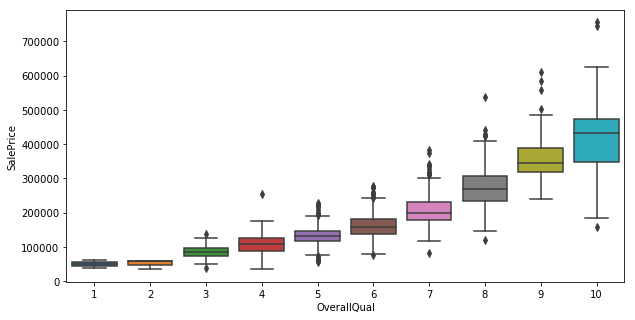

In [420]:
plt.subplots(figsize = (10, 5))
sns.boxplot(train_x.OverallQual, train_Y)
plt.show()

# 4a. Linear Regression (Without Normalization)

In [422]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

In [423]:
model.fit(train_x, train_Y)

accuracies = cross_val_score(estimator=model, X=train_x, y=train_Y, cv=10)
print(accuracies.mean())

0.594080013161


# 4b. Linear Regression (With Normalization)

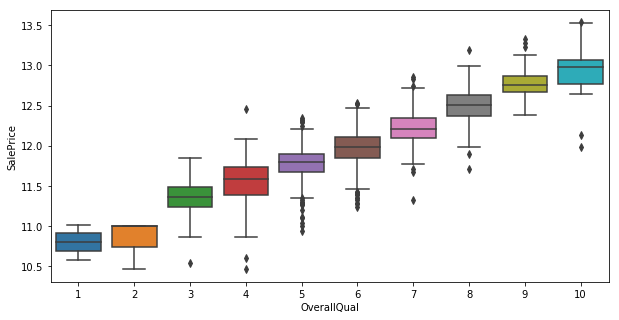

In [424]:
train_Ylog = np.log(train_Y)

plt.subplots(figsize = (10,5))
sns.boxplot(train_x.OverallQual, train_Ylog)
plt.show()

In [427]:
model_log = LinearRegression()

model_log.fit(train_x, train_Ylog)
accuracies = cross_val_score(estimator = model_log, X=train_x, y=train_Ylog)

print(accuracies.mean())

0.851821896027
